### 5. Longest Palindromic Substring
---

Given a string s, return the longest palindromic substring in s.

---

Example 1:

Input: s = "babad" <br>
Output: "bab"
Note: "aba" is also a valid answer.


Example 2:

Input: s = "cbbd"<br>
Output: "bb"


Example 3:

Input: s = "a"<br>
Output: "a"


Example 4:

Input: s = "ac"<br>
Output: "a"

### 가장 긴 팰린드롬 부분 문자열 

---
 #### 가장 긴 팰린드롬 부분 문자열을 출력하라.
 
* __예제 1__:
 * __입력__
 > "babad"
 * __출력__
 > "bab"
 * __설명__
 > "bab" 외에 "aba"도 정답이다. 
 
  
* __예제 2__:
 * __입력__
 > "cbbd"
 * __출력__
 > "bb"

### 중앙을 중심으로 확장하는 풀이 
---
컴퓨터과학의 오랜 문제 중에 '최장 공통 부분 문자열(Longest commnon Substring)'이라는 문제가 있다. 여러 개의 문자열이 있을 때 서로 공통된 가장 긴부분 문자열을 찾는 문제로 다이나믹 프로그래밍(23장 참조)으로 풀 수 있는 전형적인 문제이다. 이 문제 또한 동일한 유형의 문제로서, 동일하게 다이나믹 프로그래밍으로 풀 수 있다. 그러나 이 문제의 경우 다이나믹 프로그래밍을 이용한 풀이는 직관적으로 이해가 어렵고, 무엇보다도 일반적인 예상과 달리 실행 속도가 늦다. 따라서 여기서는 좀 더 직관적이면서도 훨씬 더 성능이 좋은, 투 포인터가 중앙을 중심으로 확장하는 형태로 풀이해보겠다. 팰린드롬 판별만 하면 된다는 점에 착안해서, 매칭이 될 때 중앙을 중심으로 점점 확장해 나가면서 가장 긴 팰린드롬을 판별하는 알고리즘을 구현해보자.

먼저, 다음 그림 6-3과 같이 투 포인터가 슬라이딩 윈도우(20장 참조)처럼 이동한다.
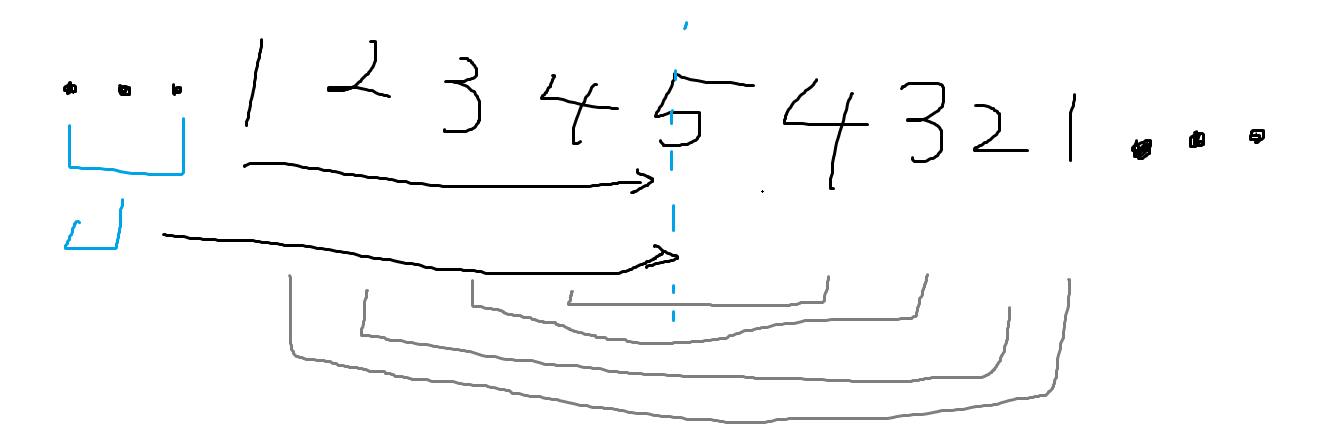
__그림 6-3__  전진하는 2개의 투포인터

방식은 간단하다. 이 그림처럼 2칸,3칸으로 구성된 투 포인터가 슬라이딩 윈도우처럼 계속 앞으로 전진해나간다. 이때 윈도우에 들어온 문자열이 팰린드롬인 경우 그 자리에 먼추고, 투 포인터가 점점 확장하는 식이다. 팰린드롬은 bb처럼 짝수(2칸, 2->4->6 형태로 증가)일 때도 있고, bab처럼 홀수(3칸, 1->3->5 형태로 증가)잉 때도 있다. 따라서 짝수나 홀수 모든 경우에 대해 판별한다. 그림 6-3에서는 처음부터 bab에 바로 정답이 매칭되는 것을 확인 할 수 있다.

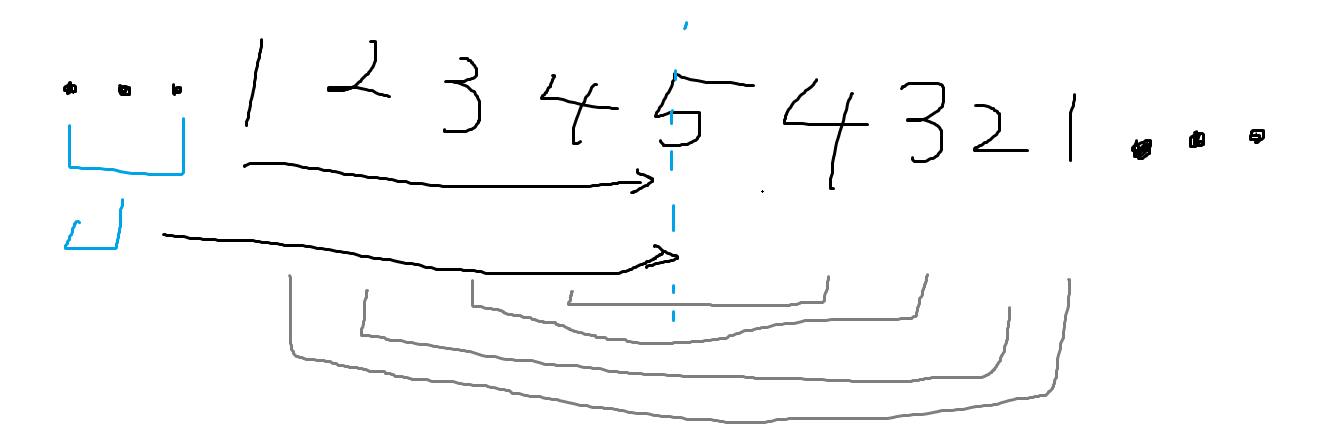
__그림 6-4__ 중앙을 중심으로 확장

좀 더 복잡한 예를 그림6-4에서 살펴보자. 마찬가지로 홀수(3칸)와 짝수(2칸)의 2개 투 포인터가 계속 우측으로 이동한다 5에서 호수 투포인터가 454로 확장되면서 매칭이 되고, 34543, 2345432, 123454321까지 확장되면서 가장 긴 값으로 저장된다. 이 그림에서 짝수 투 포인터는 팰린드롬이 아니므로 무시된다.

그렇다면 지금까지 설명한 내용을 코드로 구현해보자. 먼저, 예외 처리를 해야 한다. 특히 파이썬의 문자열 슬라이싱은 앞서 살펴본 바와 같이 매우 빠르기 때문에 s == s[::-1]로 필터링하는 것만으로도 전체적인 풀이 속도 향상에 매우 큰 도움이 된다.

> if len(s) < 2 or s == s[::-1]: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;return s
    
슬라이싱과 s[3]처럼 인덱스로 직접 조회하는 것은 숫자를 표기하는 방식이 다르므로 주의가 필요하다. 예를 들어 s ='12345'일 때, s[1:3]은 23이 나오지만 s[3]은 4가 나온다. 
즉 슬라이싱은 n-1만큼 출력되며, 인덱스의 값이 나온다. 이 부분은 실제 코딩 테스트시에도 상당히 헷갈리는 부분이며, 버그의 주범이 되므로 반드시 잘 숙지해야한다. 이제 슬라이딩 윈도우가 다음과 같이 문자여 처음부터 끝까지 우측으로 이동한다.

> for i in range(0,len(s) - 1): 
    result = max(result,    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;expand(s, i, i+1),    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;expand(s, i, i+2),    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;key = len)    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;return result
    
expand()로 정의한 중첩 함수(12장 참조)에서 홀수, 짝수 2개의 투 포인터가 팰린드롭 여부를 판별하면서 슬라이딩 윈도우처럼 계속 우측으로 이동한ㄷ. 이렇게 판별한 최댓값이 최종 결과가 된다. 전체 코드는 다음과 같다.

In [5]:
def longestPalindrome(self, s:str) -> str :
    #팰린드롬 판별 및 투 포인터 확장
    def expand(left: int, right: int) -> str:
        while left >= 0 and right <= len(s) and s[left] == s[right -1]:
            left -= 1ㅁ
            right += 1
        return s[left +1 : right-1]
    
    # 해당 사항이 없을 때 빠르게 리턴
    if len(s) <2 or s ==s[::-1]:
        return s 
    
    result = ''
    # 슬라이딩 윈도우 우측으로 이동
    for i in range(0,len(s) - 1): result = max(result,
                                               expand(s, i, i+1),
                                               expand(s, i, i+2),
                                               key = len)
    return result